In [50]:
import numpy as np
import matplotlib.pyplot as plt
import math
from utils import *

In [51]:
airfoil = np.loadtxt('BETTER/20150114-50 +2 d.dat', skiprows=1)
airfoil = interpolate(airfoil, 256, 3)

In [52]:
x = airfoil[:,0]
y = airfoil[:,1]

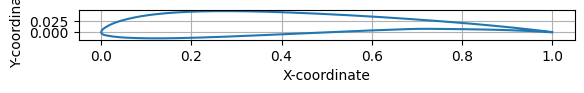

In [53]:
plt.plot(x,y)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.grid()

In [54]:
def hicks_henne(x_coord, y_coord , n, a, w, xM):
    y_deformed = np.array(y_coord)
    for i in range(n):
        ai = a[i]
        xMi = xM[i]
        wi = w[i]
        m = np.log(0.5)/np.log(xMi)
        f = np.sin(np.pi * np.array(x_coord) ** m ) ** wi
        y_deformed += ai * f
        x_1 = []
        for j in range(0,1001):
            x_1.append(j/1000)
        f_b = np.sin(np.pi * np.array(x_1) ** m ) ** wi
    return y_deformed

def split(af):
    half = af[:,0].argmin()
    return af[:half,0], af[half:,0],af[:half,1], af[half:,1]

def mute_airfoil(airfoil, a_up, a_low):
    n = 15
    w = np.full(n,2) 
    xM = np.array([])
    for i in range(1,n+1):
        x_m =  0.5 * (1 - math.sin(math.pi * 2 * i / n))
        xM = np.append(xM,x_m)
    xM = np.sort(xM)
    x_up, x_low, y_up, y_low = split(airfoil)
    y_mod_up = hicks_henne(x_up, y_up, n, a_up, w, xM)
    y_mod_low = hicks_henne(x_low, y_low, n, a_low, w, xM)
    y_mod = np.concatenate((y_mod_up, y_mod_low))
    new_af = np.zeros_like(airfoil)
    new_af[:,0] = airfoil[:,0]
    new_af[:,1] = y_mod
    return new_af

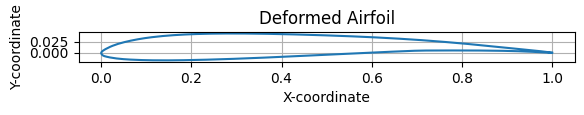

In [55]:
#inputs
n = 15
a_up =  [0.0001, 0.002, 0.002, 0.004, 0.002, 0.001, 0.005, 0.005, 0.003, -0.002, 0.002, 0.001, 0.001, 0.001, 0.0001]
a_low = [0.0001, -0.01, 0.02, -0.01,  -0.02, -0.002, 0.005, 0.005, 0.003, -0.002, 0.002, 0.001, 0.001, 0.001, 0.0001]
x = np.random.normal(size=[30])
a_up0 = x[0:1] * 0.0001
a_up1 = x[1:6] * 0.001
a_up2 = x[6:12] * 0.001
a_up3 = x[12:15] * 0.0001
a_up = np.concatenate([a_up0, a_up1, a_up2, a_up3])
a_low0 = x[15:16] * 0.0001
a_low1 = x[16:22] * 0.001
a_low2 = x[22:26] * 0.001
a_low3 = x[26:] * 0.0001
a_low = np.concatenate([a_low0, a_low1, a_low2, a_low3])
w = np.full(n,2) 

xM = np.array([])
for i in range(1,n+1):
    x_m =  0.5 * (1 - math.sin(math.pi * 2 * i / n))
    xM = np.append(xM,x_m)
xM = np.sort(xM)

airfoil = mute_airfoil(airfoil, a_up=a_up, a_low=a_low)
plt.plot(airfoil[:,0],airfoil[:,1])
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Deformed Airfoil')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.grid()